## Covid 19 Case Prediction using Genetic Algorithm

1. #### Aditya Permana
2. #### Afif Izzul Falakh
3. #### Gde Putu Rizkinindra
4. #### Grace Mutore

Dataset obtained from kawal covid 19 data in this url https://docs.google.com/spreadsheets/d/1ma1T9hWbec1pXlwZ89WakRk-OfVUQZsOCFl4FwZxzVw/edit#gid=387345074
we then only get 52 data points from 1st February 2021 to 24nd March 2021 and put it in here https://wpsqa.aizzulf.site/covid_dataset.csv

### Step 1 : Objective and Fitness Function
by Afif Izzul Falakh

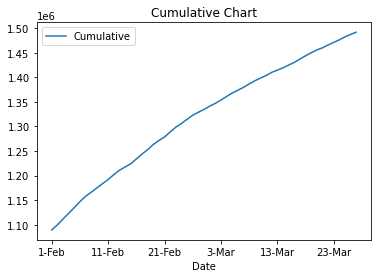

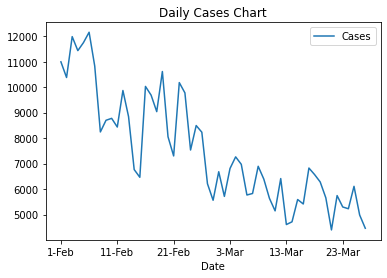

In [ ]:
# loading dataset
import pandas as pd
from matplotlib import pyplot

dataset = pd.read_csv('https://wpsqa.aizzulf.site/covid_dataset.csv', header=None, names=['Date', 'Cases', 'Cumulative'])
dataset.plot(x="Date", y="Cumulative", title="Cumulative Chart")
dataset.plot(x="Date", y="Cases", title="Daily Cases Chart")
#dataset

we are using Auto Regressive Integrated Moving Average (ARIMA) Model with the order of (1, 1, 0) to predict the cumulative covid cases at date T. The formula is given as follow:

Ŷt  =  μ  + Yt-1  +  ϕ1 (Yt-1 - Yt-2)

Where:
1. Ŷt = the prediction number of case at date t
1. μ = constant white noise
1. Yt-1 = the number of case at date t - 1
1. ϕ1 = constant
1. Yt-1 = the number of case at date t - 1
1. Yt-2 = the number of case at date t - 2

While the fitness function is measured using Mean Absolute Error (MAE) which are presented in the following equations

![image.png](https://www.gstatic.com/education/formulas2/355397047/en/mean_absolute_error.svg)

In [ ]:
# Define the objective function
def ARIMA (miu, theta, dateIndex):
  return miu + dataset['Cumulative'][dateIndex - 1] + theta * (dataset['Cumulative'][dateIndex-1] - dataset['Cumulative'][dateIndex-2])

In [ ]:
# Define the fitness Function
def fitfunc (predicted):
  totalAE = 0
  for x in range(len(predicted)):
    totalAE += abs(predicted[x] - dataset['Cumulative'][x])
  MAE = totalAE / len(predicted)
  return 1/MAE

In [ ]:
# Define the popsize
popsize = 15

In [ ]:
# initialize population as array containing miu and theta
# using uniform random float value
import random
population = []
for x in range(popsize):
  population.append([random.randint(10000, 30000), round(random.uniform(1, 5), 2)])
population

[[11426, 4.54],
 [24086, 1.68],
 [15929, 3.11],
 [15347, 4.4],
 [28072, 2.78],
 [16343, 1.37],
 [22689, 1.89],
 [16491, 4.14],
 [22569, 1.32],
 [13143, 3.08],
 [13561, 3.09],
 [15568, 2.76],
 [25219, 4.09],
 [10240, 2.42],
 [23082, 2.23]]

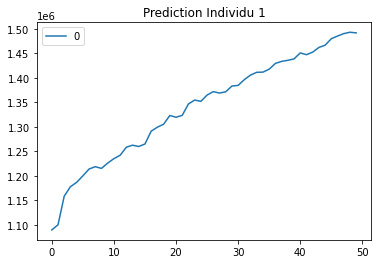

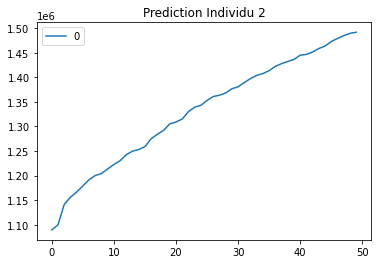

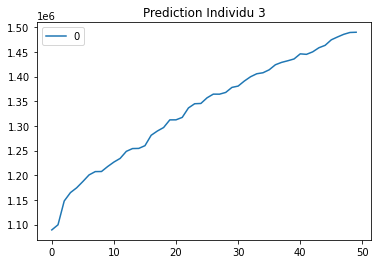

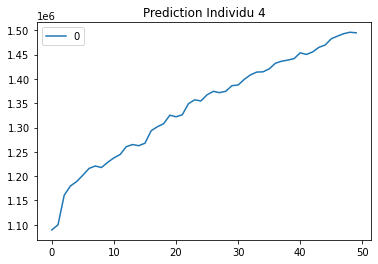

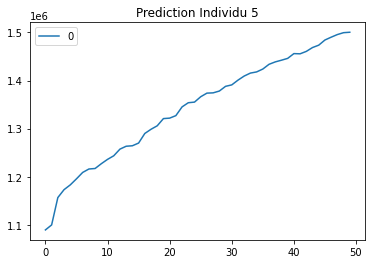

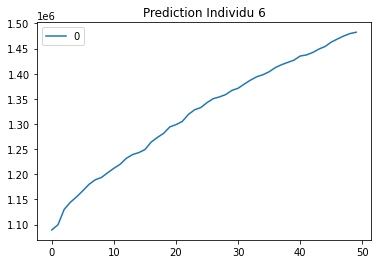

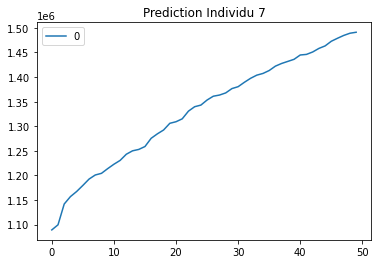

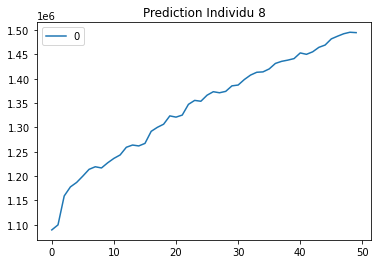

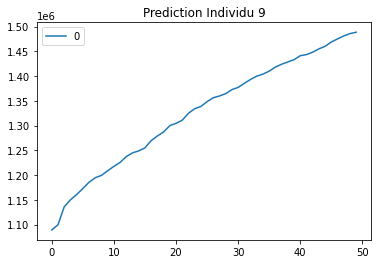

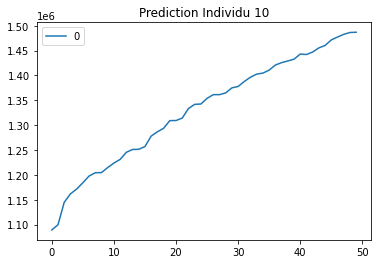

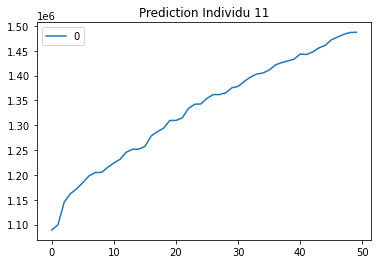

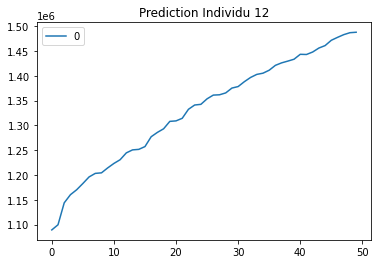

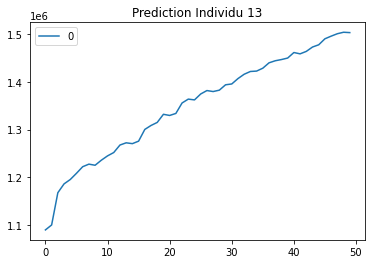

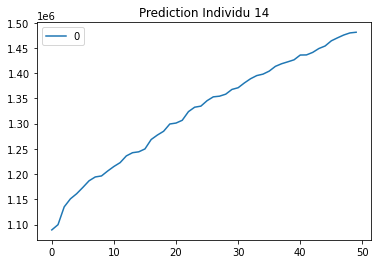

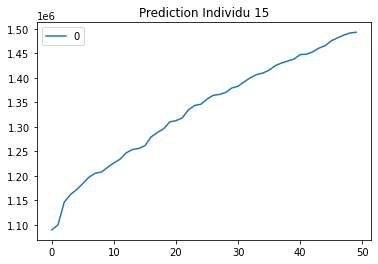

In [ ]:
# calculating C(t) using ARIMA Model equation
predicted = [0] * len(population)
for index in range(len(population)):
  predicted[index] = [0] * 50
  predicted[index][0] = dataset['Cumulative'][0]
  predicted[index][1] = dataset['Cumulative'][1]
  for x in range(2, 50):
    predicted[index][x] = ARIMA(population[index][0], population[index][1], x)
for y in range(len(predicted)):
  predpd = pd.DataFrame(predicted[y])
  predpd.plot(title=("Prediction Individu " + str(y + 1)))

In [ ]:
fitness = [0] * len(population)
for index in range(len(population)):
  fitness[index] = round(fitfunc(predicted[index]),8)
fitness

[2.68e-05,
 3.539e-05,
 3.222e-05,
 2.497e-05,
 2.485e-05,
 5.398e-05,
 3.512e-05,
 2.55e-05,
 4.144e-05,
 3.554e-05,
 3.495e-05,
 3.56e-05,
 2.118e-05,
 4.889e-05,
 3.187e-05]



---



***The Next Step is we must do the Roulette Wheel process. ***

In [ ]:
#Show the population data with the fitness value
datapop = population
datafit = fitness

print ("Population:   ", "Fitness Value:  ")
res = "\n".join("{} {}".format(x,y) for x,y in zip(datapop, datafit))
print (res)

Population:    Fitness Value:  
[11426, 4.54] 2.68e-05
[24086, 1.68] 3.539e-05
[15929, 3.11] 3.222e-05
[15347, 4.4] 2.497e-05
[28072, 2.78] 2.485e-05
[16343, 1.37] 5.398e-05
[22689, 1.89] 3.512e-05
[16491, 4.14] 2.55e-05
[22569, 1.32] 4.144e-05
[13143, 3.08] 3.554e-05
[13561, 3.09] 3.495e-05
[15568, 2.76] 3.56e-05
[25219, 4.09] 2.118e-05
[10240, 2.42] 4.889e-05
[23082, 2.23] 3.187e-05


In [ ]:
#define the PC = 80%

pc = int(0.8 * len(population))
pc

12

In [ ]:
#generate the roulette wheel selection
import random

rou_list = list(zip(datapop,datafit))
random.shuffle(rou_list)
rpc = random.choices(rou_list, k=pc)

print ("selected individu:  ")
rpc
#rou_list

selected individu:  


[([24086, 1.68], 3.539e-05),
 ([28072, 2.78], 2.485e-05),
 ([25219, 4.09], 2.118e-05),
 ([16491, 4.14], 2.55e-05),
 ([22689, 1.89], 3.512e-05),
 ([25219, 4.09], 2.118e-05),
 ([15347, 4.4], 2.497e-05),
 ([13143, 3.08], 3.554e-05),
 ([13561, 3.09], 3.495e-05),
 ([22689, 1.89], 3.512e-05),
 ([13143, 3.08], 3.554e-05),
 ([13561, 3.09], 3.495e-05)]

*** This step is Cross Over step ***

In [ ]:
import numpy as np

def crossover (population) :
  selected_pops = population
  n_offspring = int(round(len(selected_pops)/2,0)) # n_crossover
  n_selected_pops = len(selected_pops)
  offspring = []
  avaliable_individu = [*range(0,n_selected_pops,1)]
  alpha = 0.8
  # define the location of genes that we will cross, gen 1 or gen 2 because it's only 2 genes miu and theta
  cross_point = random.randint(1,2)
  #print(cross_point)
  
  #print('Population before Crossover :')
  #for x in range(n_selected_pops):
  #  print('Individu -', ' ', x+1,' = ',selected_pops[x][0])

  for i in range(n_offspring):
    get_individu_1 = random.choice(avaliable_individu)
    while True:
      get_individu_2 = random.choice(avaliable_individu)
      if (get_individu_1 != get_individu_2) :
        avaliable_individu.remove(get_individu_1)
        avaliable_individu.remove(get_individu_2)
        break
      
    random_parent_1 = selected_pops[get_individu_1]
    random_parent_2 = selected_pops[get_individu_2]
    miu_parent_1 = random_parent_1[0][0]
    theta_parent_1 = random_parent_1[0][1]
    miu_parent_2 = random_parent_2[0][0]
    theta_parent_2 = random_parent_2[0][1]

    if cross_point == 1 :
      new_miu_parent_1 = (miu_parent_1 * (1-alpha)) + (miu_parent_2 * alpha)
      new_miu_parent_2 = (miu_parent_1 * alpha) + (miu_parent_2 * (1-alpha))
      offspring.append([new_miu_parent_1,theta_parent_1])
      offspring.append([new_miu_parent_2,theta_parent_2])
    else :
      new_theta_parent_1 = (theta_parent_1 * (1-alpha)) + (theta_parent_2 * alpha)
      new_theta_parent_2 = (theta_parent_1 * alpha) + (theta_parent_2 * (1-alpha))
      offspring.append([miu_parent_1,new_theta_parent_1])
      offspring.append([miu_parent_2,new_theta_parent_2])

  return offspring


In [ ]:
offspring_result = crossover(rpc)
#print('Population after Crossover :')
#offspring_result
#print(len(offspring_result))

Population before Crossover :
Individu -   1  =  [11202.44608, 1.7992]
Individu -   2  =  [11202.44608, 1.7992]
Individu -   3  =  [11202.44608, 1.7992]
Individu -   4  =  [11202.44608, 1.7992]
Individu -   5  =  [11202.44608, 1.7992]
Individu -   6  =  [11202.44608, 1.7992]
Individu -   7  =  [11202.44608, 1.7992]
Individu -   8  =  [11202.44608, 1.7992]
Individu -   9  =  [11202.44608, 1.7992]
Individu -   10  =  [11202.44608, 1.7992]
Individu -   11  =  [11202.44608, 1.7992]
Individu -   12  =  [11202.44608, 1.7992]


**Mutation step...**

In [ ]:
import numpy

import random

#Gnome size = 12*2 =24
# Pm = 10%
#Genes that mutated = 10%*24 = 2

def mutation(offspring_result):
  mutation_result = offspring_result
  gnome_size = len(offspring_result)*len(offspring_result[0])
  Pm = 0.1
  number_mutation = int(round(Pm * gnome_size,0))

  for x in range(number_mutation):
    mutation_position = random.randint(1,gnome_size)
    individu_index = int(round(mutation_position/len(offspring_result[0]),0))
    left_over = mutation_position% len(offspring_result[0])
    if left_over != 0:
      new_miu = random.randint(10000,30000)
      mutation_result[individu_index - 1][0] = new_miu
    else:
      new_theta = round(random.uniform(1, 5), 2)
      mutation_result[individu_index - 1][1] = new_theta
  return mutation_result

mutation_result = mutation(offspring_result)
print(mutation_result)



[[25219, 3.29], [13561, 3.89], [10065, 3.282], [13143, 3.888], [16491, 2.1719999999999997], [17499, 3.6479999999999997], [22689, 1.89], [22689, 1.89], [13143, 3.088], [13561, 3.0820000000000003], [28072, 4.0760000000000005], [15347, 3.1039999999999996]]


## Generation Update upto 50 Generation

In [ ]:
generation_num = 50
last_gen = []
for x in range(generation_num):
  # calculating C(t) using current population
  prediction = [0] * len(population)
  for index in range(len(population)):
    prediction[index] = [0] * 50
    prediction[index][0] = dataset['Cumulative'][0]
    prediction[index][1] = dataset['Cumulative'][1]
    for x in range(2, 50):
      prediction[index][x] = ARIMA(population[index][0], population[index][1], x)
  
  # current population fitness value
  fitness = [0] * len(population)
  for index in range(len(population)):
    fitness[index] = round(fitfunc(prediction[index]),8)

  # roulette wheel selection
  rou_list = list(zip(population,fitness))
  random.shuffle(rou_list)
  rpc = random.choices(rou_list, k=pc)
  
  # offspring crossover
  offspring = crossover(rpc)
  
  # offspring mutation
  offspring_mutated = mutation(offspring)
  
  # calculating C(t) using mutated offspring
  prediction_offspring = [0] * len(population)
  for index in range(len(population)):
    prediction_offspring[index] = [0] * 50
    prediction_offspring[index][0] = dataset['Cumulative'][0]
    prediction_offspring[index][1] = dataset['Cumulative'][1]
    for x in range(2, 50):
      prediction_offspring[index][x] = ARIMA(population[index][0], population[index][1], x)
  
  # offspring fitness value
  offspring_fitness = [0] * len(offspring)
  for index in range(len(offspring)):
    offspring_fitness[index] = round(fitfunc(prediction_offspring[index]),8)
  
  offspring_list = list(zip(offspring_mutated,offspring_fitness))
  
  # get best 15 individu from parent + offspring
  all_individu = rpc + offspring_list
  all_individu_sorted = sorted(all_individu, key=lambda x: x[1], reverse=True)

  new_population = all_individu_sorted[0:popsize]

  # update population
  population = [i[0] for i in new_population]
  last_gen = new_population

print('Individu\tFitness Value')
last_gen

Individu	Fitness Value


[([12111.56, 1.18], 7.66e-05),
 ([12111.56, 1.18], 7.66e-05),
 ([12111.56, 1.18], 7.66e-05),
 ([12111.56, 1.18], 7.66e-05),
 ([12111.56, 1.18], 7.66e-05),
 ([12111.56, 1.18], 7.66e-05),
 ([12111.56, 1.18], 7.66e-05),
 ([12111.56, 1.18], 7.66e-05),
 ([12111.56, 1.18], 7.66e-05),
 ([12111.56, 1.18], 7.66e-05),
 ([12111.56, 1.18], 7.66e-05),
 ([12111.56, 1.18], 7.66e-05),
 ([12111.56, 1.18], 7.66e-05),
 ([12111.56, 1.18], 7.66e-05),
 ([12111.56, 1.18], 7.66e-05)]

Prediction Day 51:
1484817
Prediction Day 52:
1489587


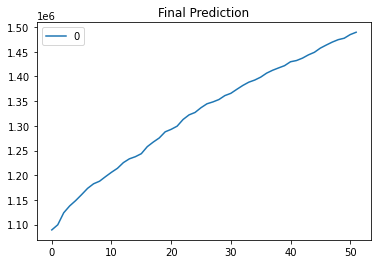

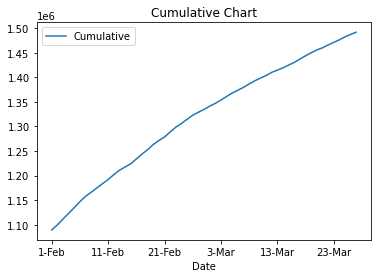

In [ ]:
# day 51 and 52 prediction
final_prediction = [0] * 52
final_prediction[0] = dataset['Cumulative'][0]
final_prediction[1] = dataset['Cumulative'][1]
for x in range(2, 52):
  final_prediction[x] = ARIMA(population[0][0], population[0][1], x)
final_prediction

finalpredpd = pd.DataFrame(final_prediction)
finalpredpd.plot(title=("Final Prediction"))
dataset.plot(x="Date", y="Cumulative", title="Cumulative Chart")

print('Prediction Day 51:')
print(int(round(final_prediction[50], 0)))
print('Prediction Day 52:')
print(int(round(final_prediction[51], 0)))
